In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [3]:

energy = yf.Ticker("IYE")
energy_hist = energy.history(period="12mo")
energy_hist


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-09-30 00:00:00-04:00,38.085700,38.657616,37.727038,38.105087,1194000,0.000,0.0,0.0
2022-10-03 00:00:00-04:00,39.491258,40.402444,39.384629,40.160107,1308300,0.000,0.0,0.0
2022-10-04 00:00:00-04:00,40.984051,41.895241,40.741714,41.895241,1246900,0.000,0.0,0.0
2022-10-05 00:00:00-04:00,41.885542,42.845199,41.333014,42.535007,1506700,0.000,0.0,0.0
2022-10-06 00:00:00-04:00,42.244207,43.320180,42.195736,43.165085,1402600,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00-04:00,46.762314,47.457443,46.742453,47.377998,262900,0.000,0.0,0.0
2023-09-26 00:00:00-04:00,46.990002,47.389999,46.919998,47.099998,470900,0.332,0.0,0.0
2023-09-27 00:00:00-04:00,47.700001,48.459999,47.520000,48.279999,482300,0.000,0.0,0.0


In [4]:
# tech = yf.Ticker('IWY')
# tech_hist = tech.history(period='12mo')
# new_df = tech_hist.drop(columns=['Capital Gains', 'Dividends', 'Stock Splits'])
# new_df

In [5]:
# most_vol = new_df['Volume'].max()
# highest_vol = new_df.loc[new_df['Volume']==most_vol]
# highest_vol

In [6]:
#Read CSV file with Stock Tickers for all stocks under the Energy and Utilities
file_path = 'infrastructure_stocks.csv'



In [7]:
#Filter data for energy and United States 
stocks_df = pd.read_csv(file_path)
energy_df= stocks_df.loc[stocks_df['Sector']=='Energy']
energy_df = energy_df.loc[energy_df['Location']=='United States']
energy_df


,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
9,LNG,CHENIERE ENERGY INC,Energy,Equity,"102,803,368.80",3.00,"102,803,368.80","608,520.00",168.94,United States,Nyse Mkt Llc,USD,1.00
10,WMB,WILLIAMS INC,Energy,Equity,"102,564,992.34",2.99,"102,564,992.34","2,980,674.00",34.41,United States,New York Stock Exchange Inc.,USD,1.00
13,KMI,KINDER MORGAN INC,Energy,Equity,"80,711,022.31",2.36,"80,711,022.31","4,841,693.00",16.67,United States,New York Stock Exchange Inc.,USD,1.00
18,OKE,ONEOK INC,Energy,Equity,"70,993,228.95",2.07,"70,993,228.95","1,094,055.00",64.89,United States,New York Stock Exchange Inc.,USD,1.00
29,TRGP,TARGA RESOURCES CORP,Energy,Equity,"48,439,836.32",1.41,"48,439,836.32","553,978.00",87.44,United States,New York Stock Exchange Inc.,USD,1.00
51,DTM,DT MIDSTREAM INC,Energy,Equity,"12,612,079.80",0.37,"12,612,079.80","236,580.00",53.31,United States,New York Stock Exchange Inc.,USD,1.00
54,ETRN,EQUITRANS MIDSTREAM CORP,Energy,Equity,"10,664,533.72",0.31,"10,664,533.72","1,115,537.00",9.56,United States,New York Stock Exchange Inc.,USD,1.00


In [8]:
len(energy_df['Ticker'])

7

In [9]:
#create a df for the stocks in the Utilities sector in United States
utilities_df = stocks_df.loc[stocks_df['Sector']=='Utilities']
utilities_df = utilities_df.loc[utilities_df['Location']=='United States']
utilities_df


,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,"140,259,544.60",4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,"112,384,023.75",3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
5,DUK,DUKE ENERGY CORP,Utilities,Equity,"108,327,231.36",3.16,"108,327,231.36","1,221,552.00",88.68,United States,New York Stock Exchange Inc.,USD,1.00
19,SRE,SEMPRA,Utilities,Equity,"67,609,656.18",1.97,"67,609,656.18","997,634.00",67.77,United States,New York Stock Exchange Inc.,USD,1.00
21,AEP,AMERICAN ELECTRIC POWER INC,Utilities,Equity,"60,818,565.66",1.77,"60,818,565.66","814,498.00",74.67,United States,NASDAQ,USD,1.00
23,EXC,EXELON CORP,Utilities,Equity,"59,751,305.92",1.74,"59,751,305.92","1,577,384.00",37.88,United States,NASDAQ,USD,1.00
24,D,DOMINION ENERGY INC,Utilities,Equity,"58,300,509.26",1.70,"58,300,509.26","1,320,809.00",44.14,United States,New York Stock Exchange Inc.,USD,1.00
28,XEL,XCEL ENERGY INC,Utilities,Equity,"49,374,363.39",1.44,"49,374,363.39","868,197.00",56.87,United States,NASDAQ,USD,1.00
30,ED,CONSOLIDATED EDISON INC,Utilities,Equity,"48,112,917.10",1.40,"48,112,917.10","562,790.00",85.49,United States,New York Stock Exchange Inc.,USD,1.00
31,PEG,PUBLIC SERVICE ENTERPRISE GROUP IN,Utilities,Equity,"44,850,129.56",1.31,"44,850,129.56","791,566.00",56.66,United States,New York Stock Exchange Inc.,USD,1.00


In [10]:
len(utilities_df['Ticker'])

15

# 

# Top 5 / Bottom 5  Energy Analysis

In [18]:
#determine top 5 based on market value
top_energy_tickers = ['LNG', 'WMB', 'KMI' ]
e_stocks = yf.Tickers(top_energy_tickers)
energy_hist = e_stocks.history(period='12mo')
top_close = energy_hist['Close']
top_close

[*********************100%%**********************]  3 of 3 completed


,KMI,LNG,WMB
Date,,,
2022-09-30,15.622690,164.249039,27.092926
2022-10-03,16.054569,165.654816,27.849977
2022-10-04,16.589720,168.713867,29.061256
2022-10-05,16.617886,169.723663,28.824678
2022-10-06,16.326838,170.782944,28.493469
...,...,...,...
2023-09-25,16.750000,164.139999,33.959999
2023-09-26,16.469999,162.009995,33.580002
2023-09-27,16.660000,165.460007,34.099998


In [57]:
top_stocks = ['KMI', 'LNG', 'WMB']
for stock in top_stocks:
    if stock == 'KMI':
        kmi_column = top_close['KMI']
        daily_kmi = kmi_column.pct_change()*100
    elif stock == 'LNG':
        lng_column = top_close['LNG']
        daily_lng = lng_column.pct_change()*100
    elif stock == 'WMB':
        wmb_column = top_close['WMB']
        daily_wmb = wmb_column.pct_change()*100

In [63]:
pct_changes_df = pd.DataFrame({'KMI % Changes': daily_kmi,
                              'LNG % Changes': daily_lng,
                              'WMB % Changes': daily_wmb})
pct_changes_df = pct_changes_df.fillna(0)
pct_changes_df = pct_changes_df.reset_index()
pct_changes_df

,Date,KMI % Changes,LNG % Changes,WMB % Changes
0,2022-09-30,0.000000,0.000000,0.000000
1,2022-10-03,2.764435,0.855881,2.794277
2,2022-10-04,3.333322,1.846642,4.349299
3,2022-10-05,0.169779,0.598526,-0.814067
4,2022-10-06,-1.751414,0.624121,-1.149047
...,...,...,...,...
246,2023-09-25,0.903612,2.638820,1.011303
247,2023-09-26,-1.671646,-1.297676,-1.118955
248,2023-09-27,1.153616,2.129506,1.548531
249,2023-09-28,0.060025,2.103225,0.909095


True


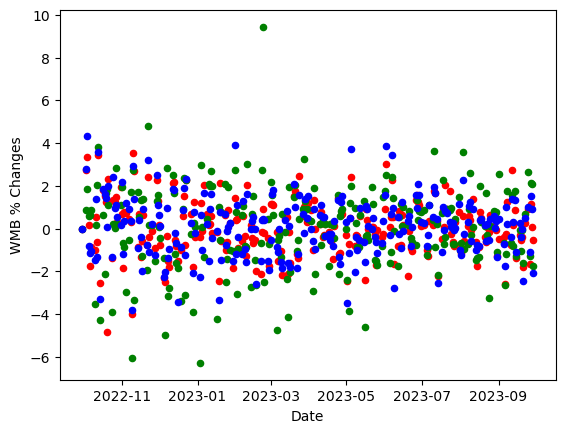

In [64]:

ax1 = pct_changes_df.plot(kind='scatter', x='Date', y='KMI % Changes', color='r')    
ax2 = pct_changes_df.plot(kind='scatter', x='Date', y='LNG % Changes', color='g', ax=ax1)    
ax3 = pct_changes_df.plot(kind='scatter', x='Date', y='WMB % Changes', color='b', ax=ax1)

print(ax1 == ax2 == ax3)  # True